In [73]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jsonschema.benchmarks.unused_registry import instance

In [74]:
file_path = "Bitcoin Historical Data6.csv"

In [99]:
df = pd.read_csv(file_path)

def convert_volume(value):
    if isinstance(value, float):
        return value
    if 'K' in value:
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000
    elif 'B' in value:
        return float(value.replace('B', '')) * 1000000000
    else:    
        return float(value)
def deleter(value):
    return float(value.replace(',', ''))
def deleter_per(value):
    return float(value.replace('%', ''))
    
df['Vol.'] = df['Vol.'].apply(convert_volume)
df['Price'] = df['Price'].apply(deleter)
df['Open'] = df['Open'].apply(deleter)
df['High'] = df['High'].apply(deleter)
df['Low'] = df['Low'].apply(deleter)
df['Change %'] = df['Change %'].apply(deleter_per)
df.head()



,Date,Price,Open,High,Low,Vol.,Change %
0,04/08/2024,71347.9,69358.0,71442.1,69110.5,55110.0,2.87
1,04/07/2024,69360.4,68897.3,70285.8,68849.4,46990.0,0.68
2,04/06/2024,68890.6,67830.5,69632.0,67467.2,41480.0,1.56
3,04/05/2024,67830.6,68498.7,68692.2,66023.3,88970.0,-0.97
4,04/04/2024,68496.5,65968.4,69238.8,65096.3,100300.0,3.84


In [100]:
df.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.        float64
Change %    float64
dtype: object

In [101]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

In [102]:
corr_matrix = df.corr()
corr_matrix

,Price,Open,High,Low,Vol.,Change %
Price,1.000000,0.999074,0.999592,0.999501,0.141143,-0.014173
Open,0.999074,1.000000,0.999586,0.999295,0.141817,-0.027340
High,0.999592,0.999586,1.000000,0.999167,0.142108,-0.020311
Low,0.999501,0.999295,0.999167,1.000000,0.141483,-0.019464
Vol.,0.141143,0.141817,0.142108,0.141483,1.000000,-0.006080
Change %,-0.014173,-0.027340,-0.020311,-0.019464,-0.006080,1.000000


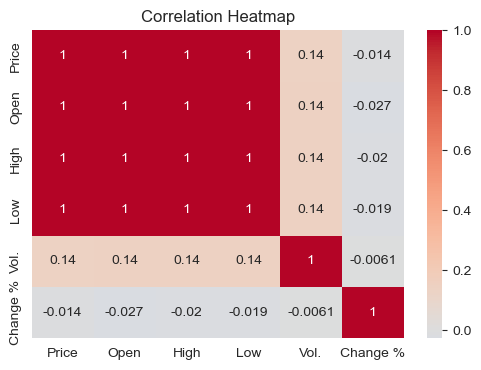

In [103]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

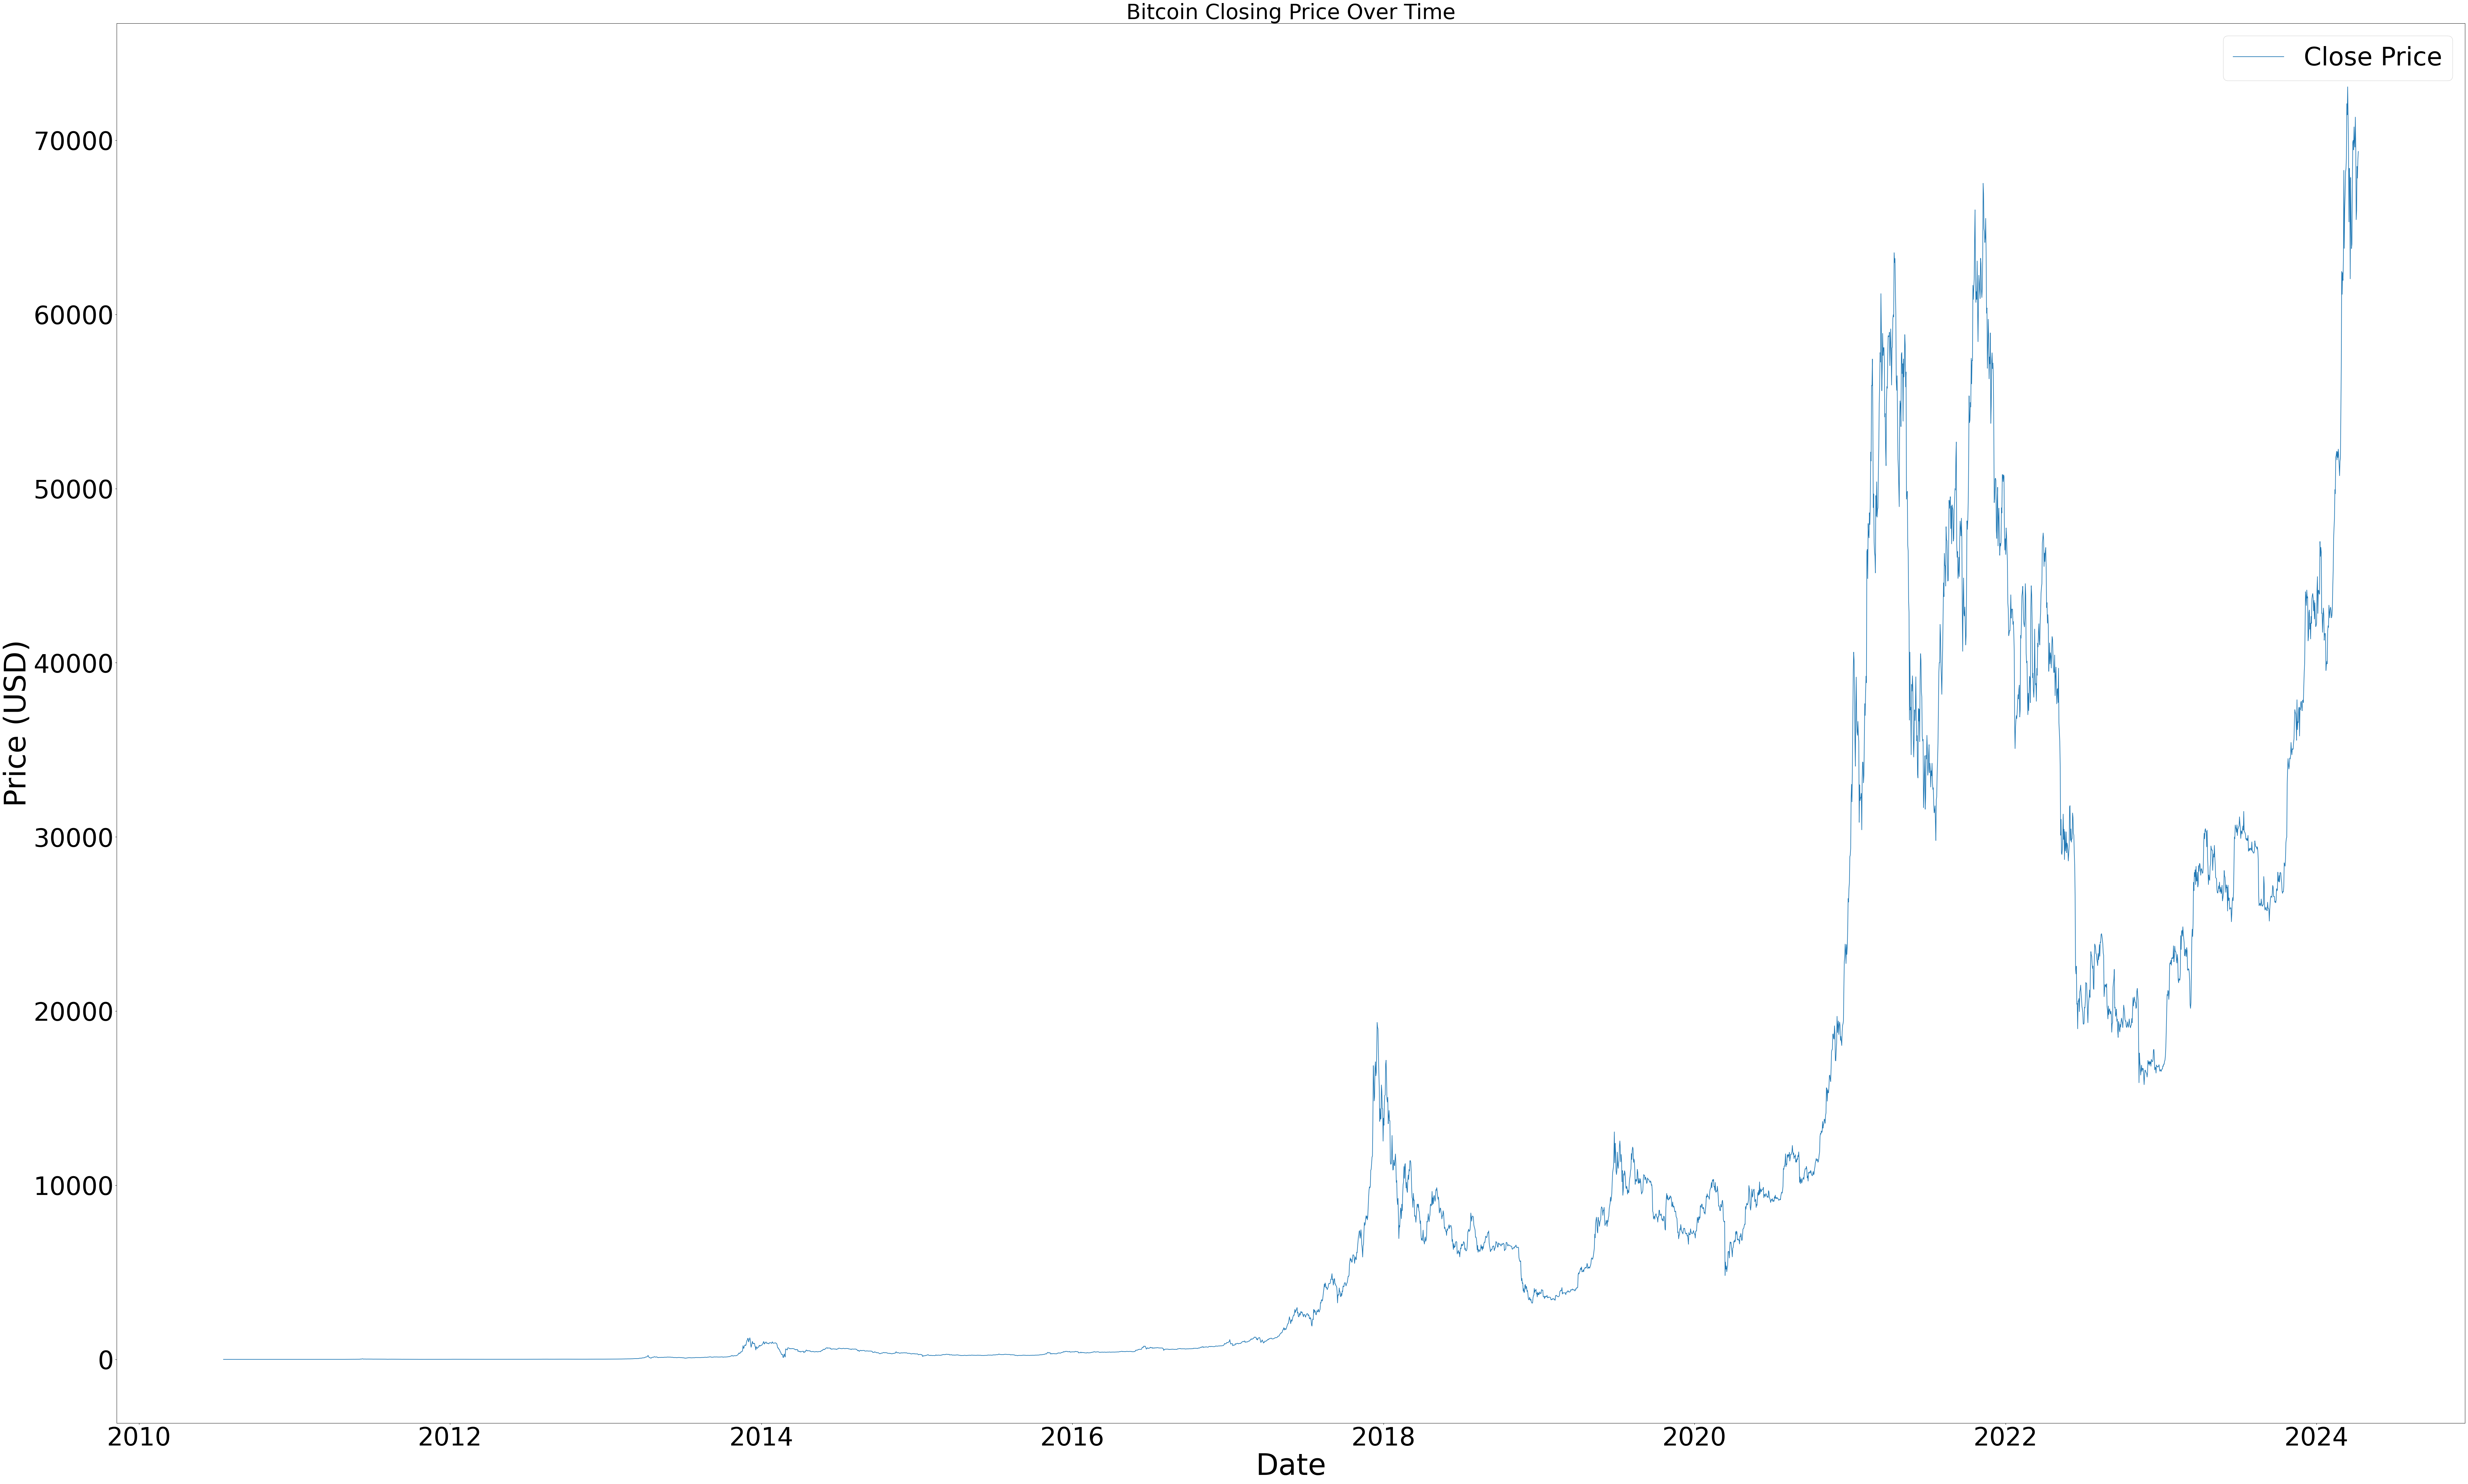

In [105]:
plt.style.use('default')
plt.figure(figsize=(100, 60))
plt.plot(df.index, df['Open'], label='Close Price', color='tab:blue')
plt.title('Bitcoin Closing Price Over Time', fontsize=50)  
plt.xlabel('Date', fontsize=70)  
plt.ylabel('Price (USD)', fontsize=70)  
plt.xticks(fontsize=60)  
plt.yticks(fontsize=60)  
plt.legend(fontsize=60)  
plt.show()

In [106]:
df.describe()

,Price,Open,High,Low,Vol.,Change %
count,5014.000000,5014.000000,5014.000000,5014.000000,5.008000e+03,5014.000000
mean,10987.032369,10972.777742,11244.819585,10682.951476,1.234002e+07,0.415931
std,16186.048994,16164.058480,16566.087827,15735.167749,1.547513e+08,7.085502
min,0.100000,0.000000,0.100000,0.000000,8.000000e+01,-57.210000
25%,227.775000,227.475000,231.800000,222.125000,3.189750e+04,-1.170000
50%,2233.800000,2213.000000,2325.850000,2081.100000,6.894500e+04,0.000000
75%,16176.525000,16068.075000,16506.300000,15499.025000,1.842700e+05,1.790000
max,73066.300000,73066.700000,73740.900000,71338.400000,4.470000e+09,336.840000


In [109]:
plt.style.use('dark_background')
fig, ax1 = plt.subplots(figsize=(100,60))


ax1.set_xlabel('Date', color='tab:green', fontsize=70)
ax1.set_ylabel('Price (USD)', color='tab:blue', fontsize=70)
ax1.plot(df.index, df['Open'], label='Close Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=70)  
ax1.tick_params(axis='x', labelcolor='tab:green', labelsize=70)


ax2 = ax1.twinx()
ax2.set_ylabel('Vol.', color='tab:red', fontsize=70)
ax2.plot(df.index, df['Vol.'], label='Volume', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=70)
ax2.tick_params(axis='x', labelcolor='tab:red', labelsize=70)


plt.title('Bitcoin Price and Volume Over Time', fontsize=70)
fig.tight_layout()
ax1.legend(loc='upper left', fontsize=70)
ax2.legend(loc='upper right', fontsize=70)
plt.show()

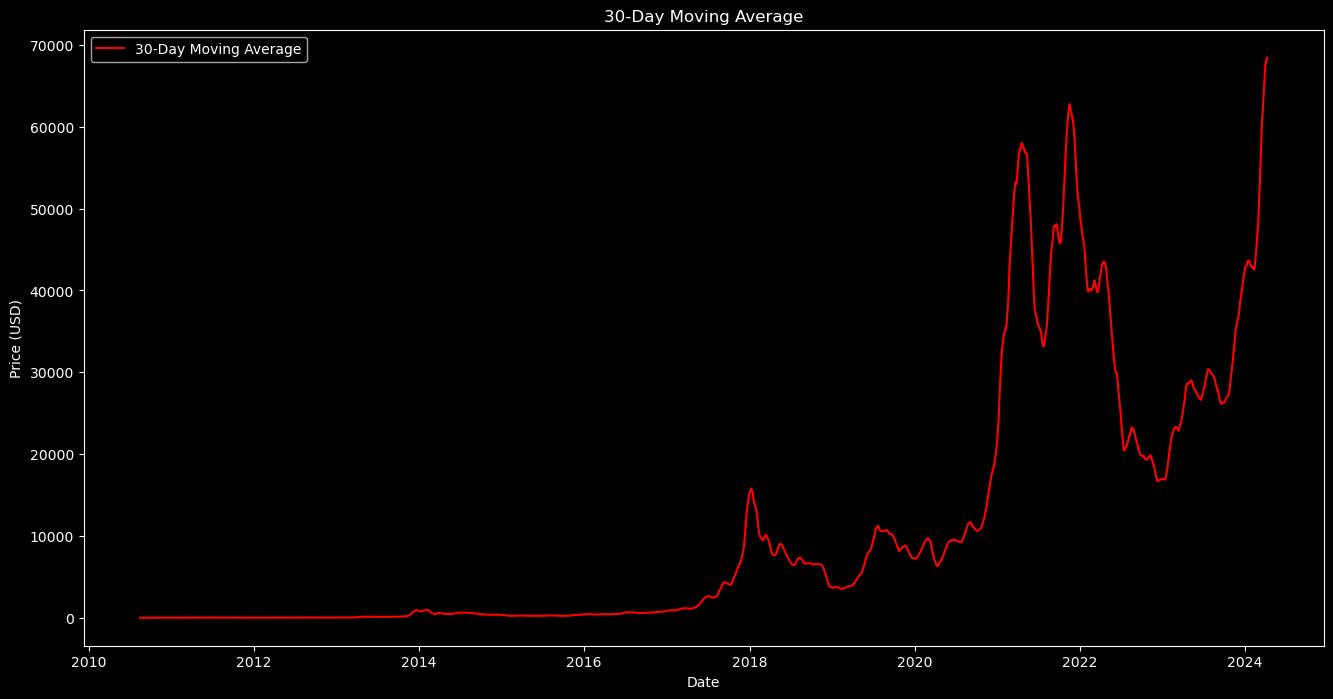

In [110]:
df['MA_30'] = df['Open'].rolling(window=30).mean()

plt.figure(figsize=(16, 8))
plt.plot(df.index, df['MA_30'], label='30-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('30-Day Moving Average')
plt.legend()
plt.show()

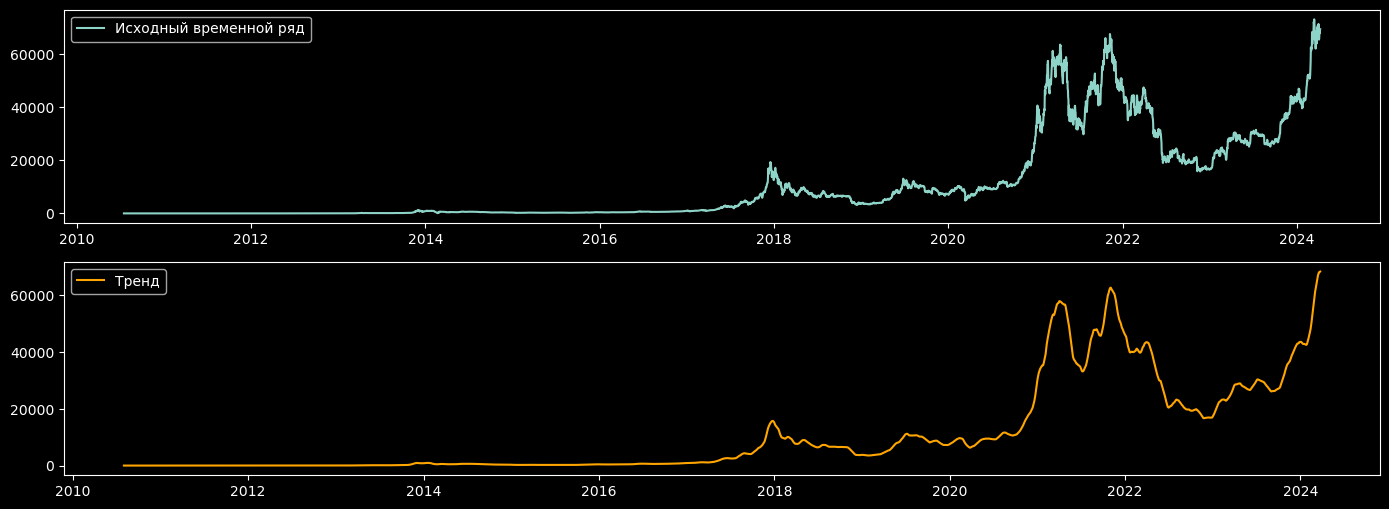

In [111]:
from statsmodels.tsa.seasonal import seasonal_decompose

series = df['Open']

decomposition = seasonal_decompose(series, model='additive', period=30)  

plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(series, label='Исходный временной ряд')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Тренд', color='orange')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

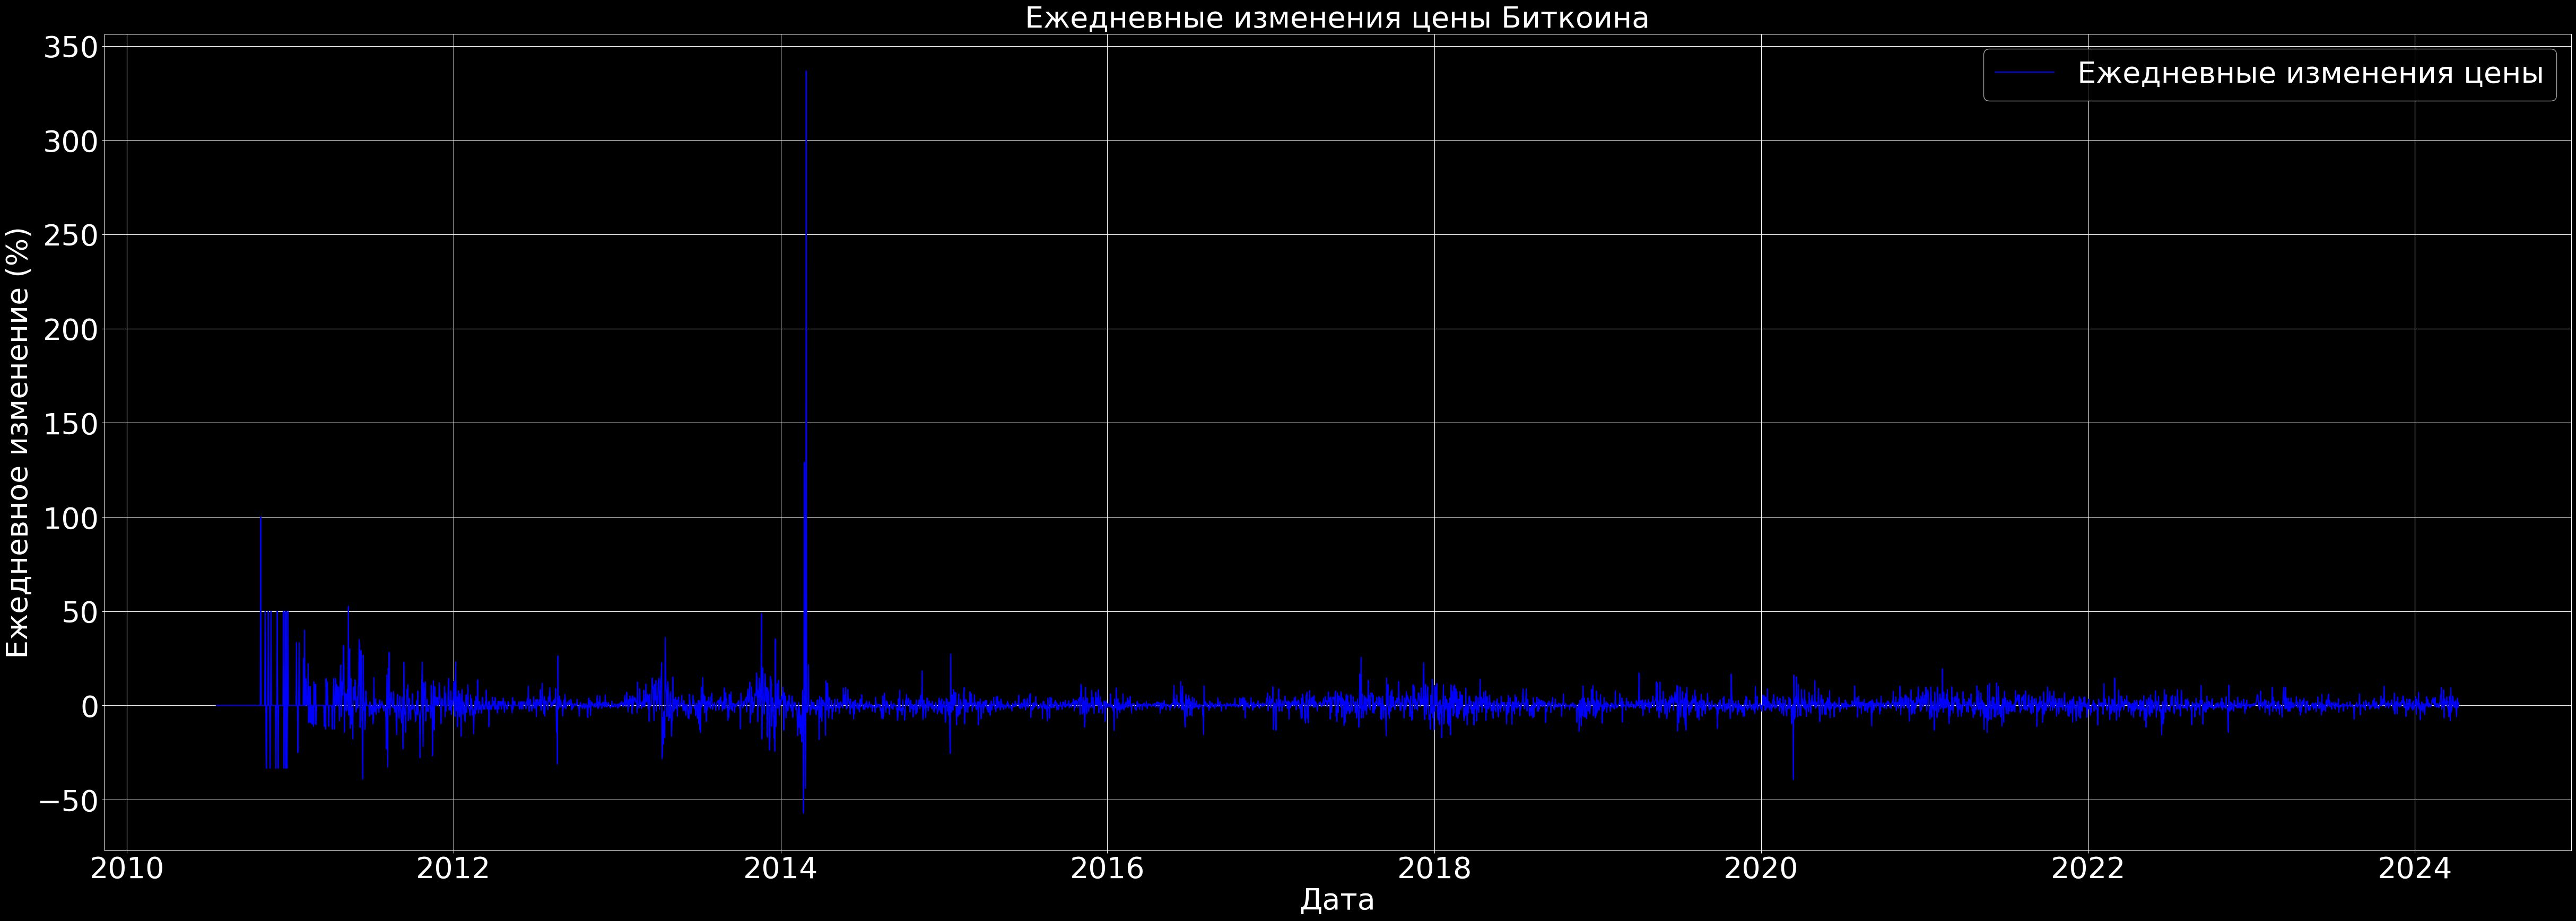

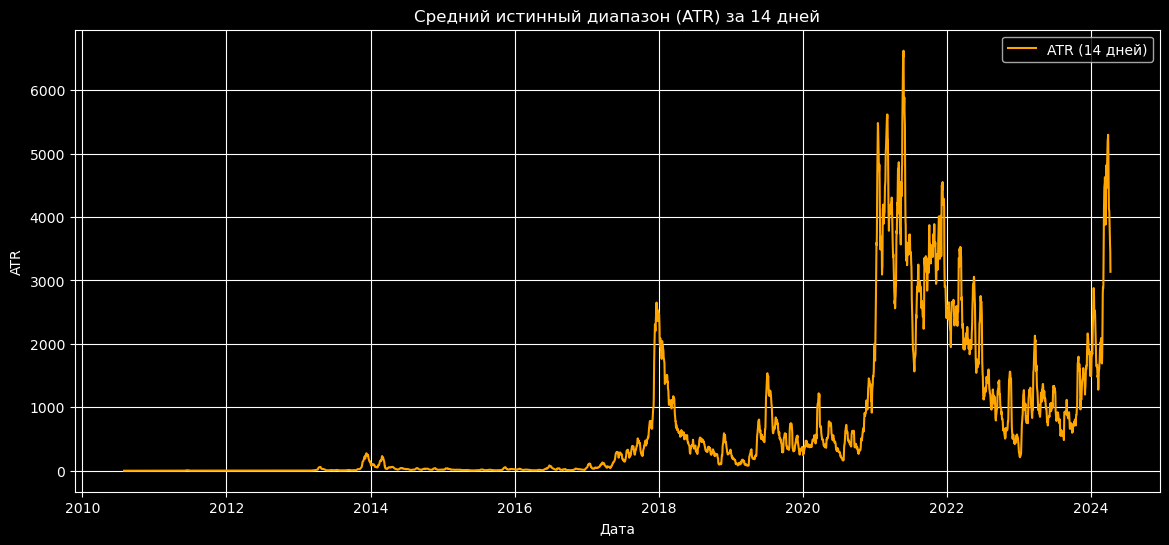

In [114]:
import numpy as np
df['daily_change'] = df['Open'].pct_change() * 100 

plt.figure(figsize=(60, 20))
plt.plot(df.index, df['daily_change'], label='Ежедневные изменения цены', color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.2)
plt.xlabel('Дата', fontsize=40)
plt.ylabel('Ежедневное изменение (%)', fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Ежедневные изменения цены Биткоина', fontsize=40)
plt.legend(fontsize=40)
plt.grid(True)
plt.show()


high_low = df['High'] - df['Low']
high_close = np.abs(df['High'] - df['Open'].shift())
low_close = np.abs(df['Low'] - df['Open'].shift())

df['TR'] = high_low.combine(high_close, max).combine(low_close, max)

atr_period = 14
df['ATR'] = df['TR'].rolling(window=atr_period).mean()

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['ATR'], label=f'ATR ({atr_period} дней)', color='orange')
plt.xlabel('Дата')
plt.ylabel('ATR')
plt.title(f'Средний истинный диапазон (ATR) за {atr_period} дней')
plt.legend()
plt.grid(True)
plt.show()

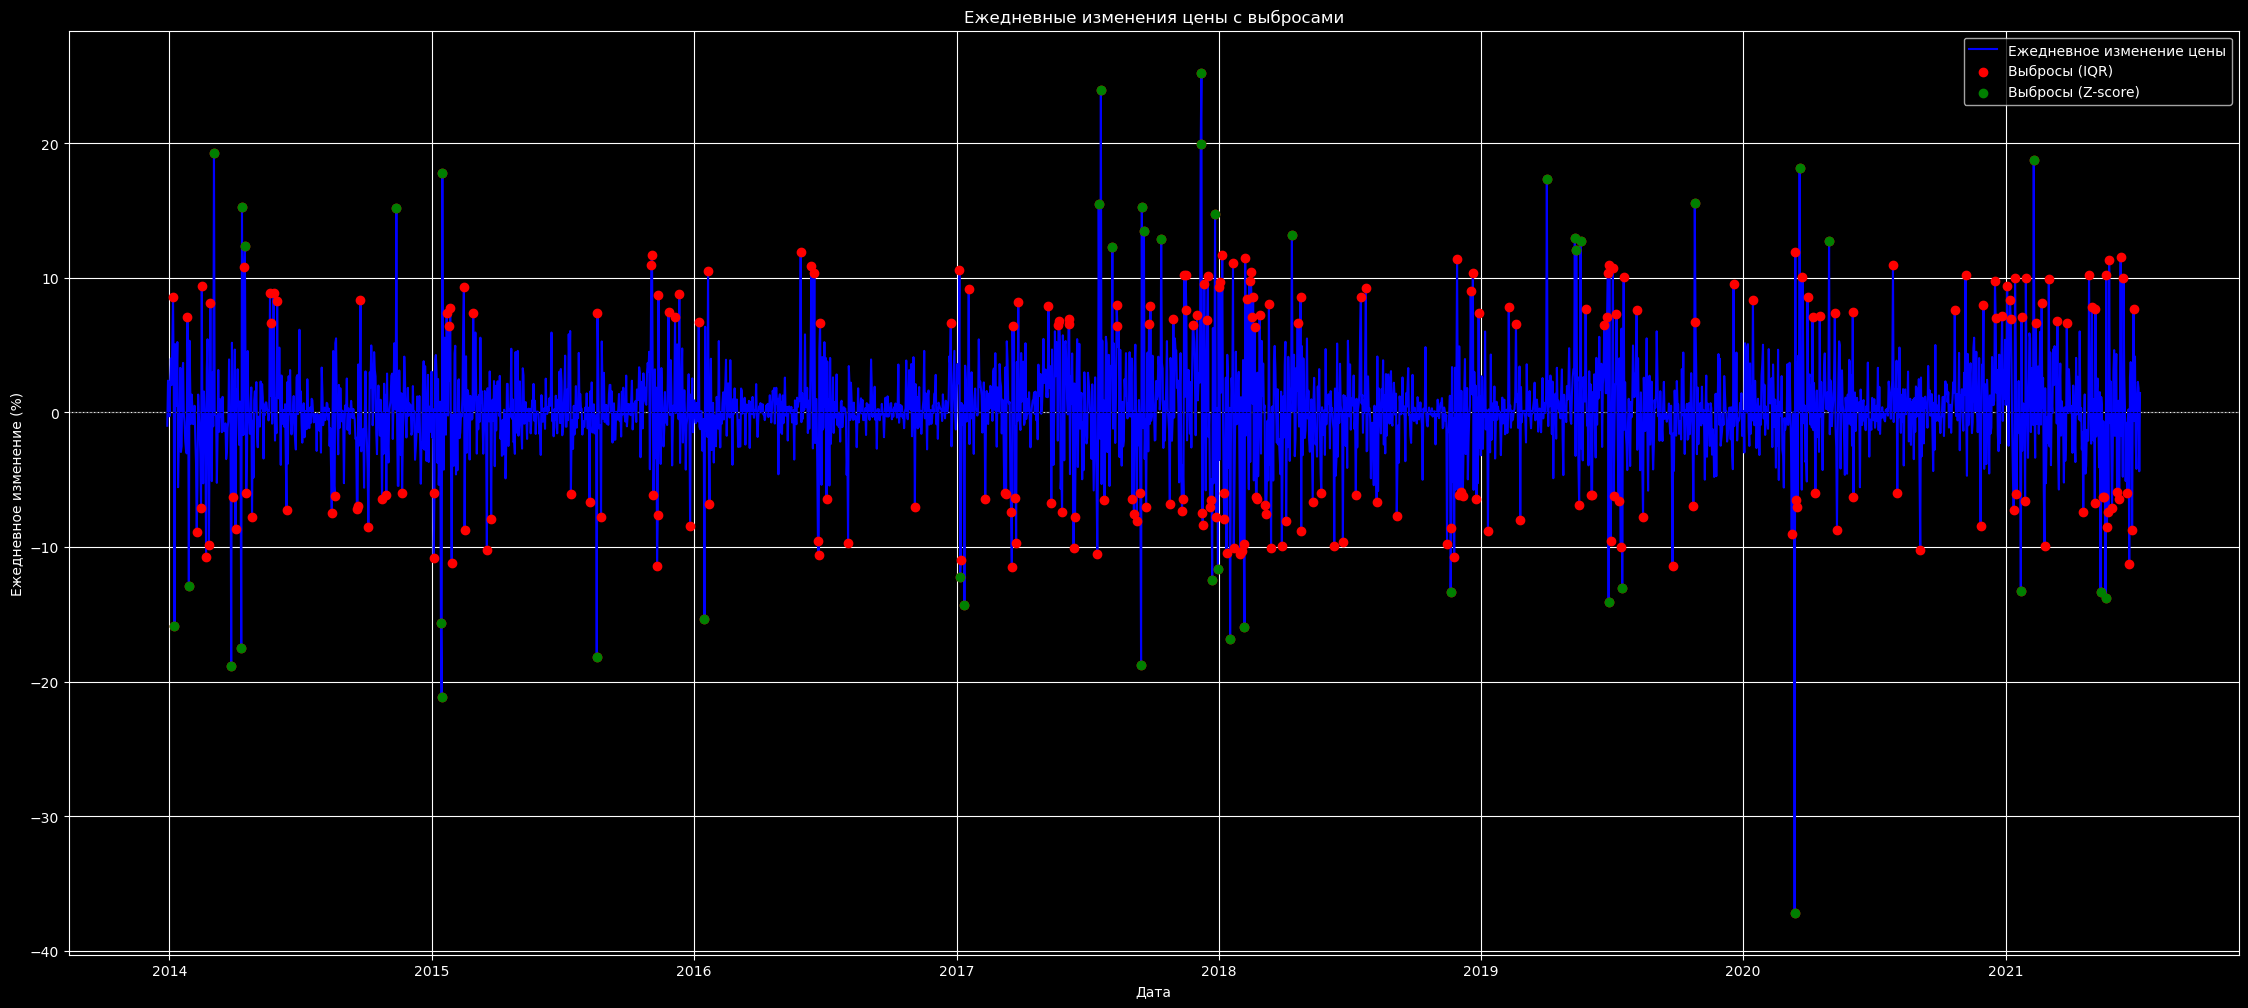

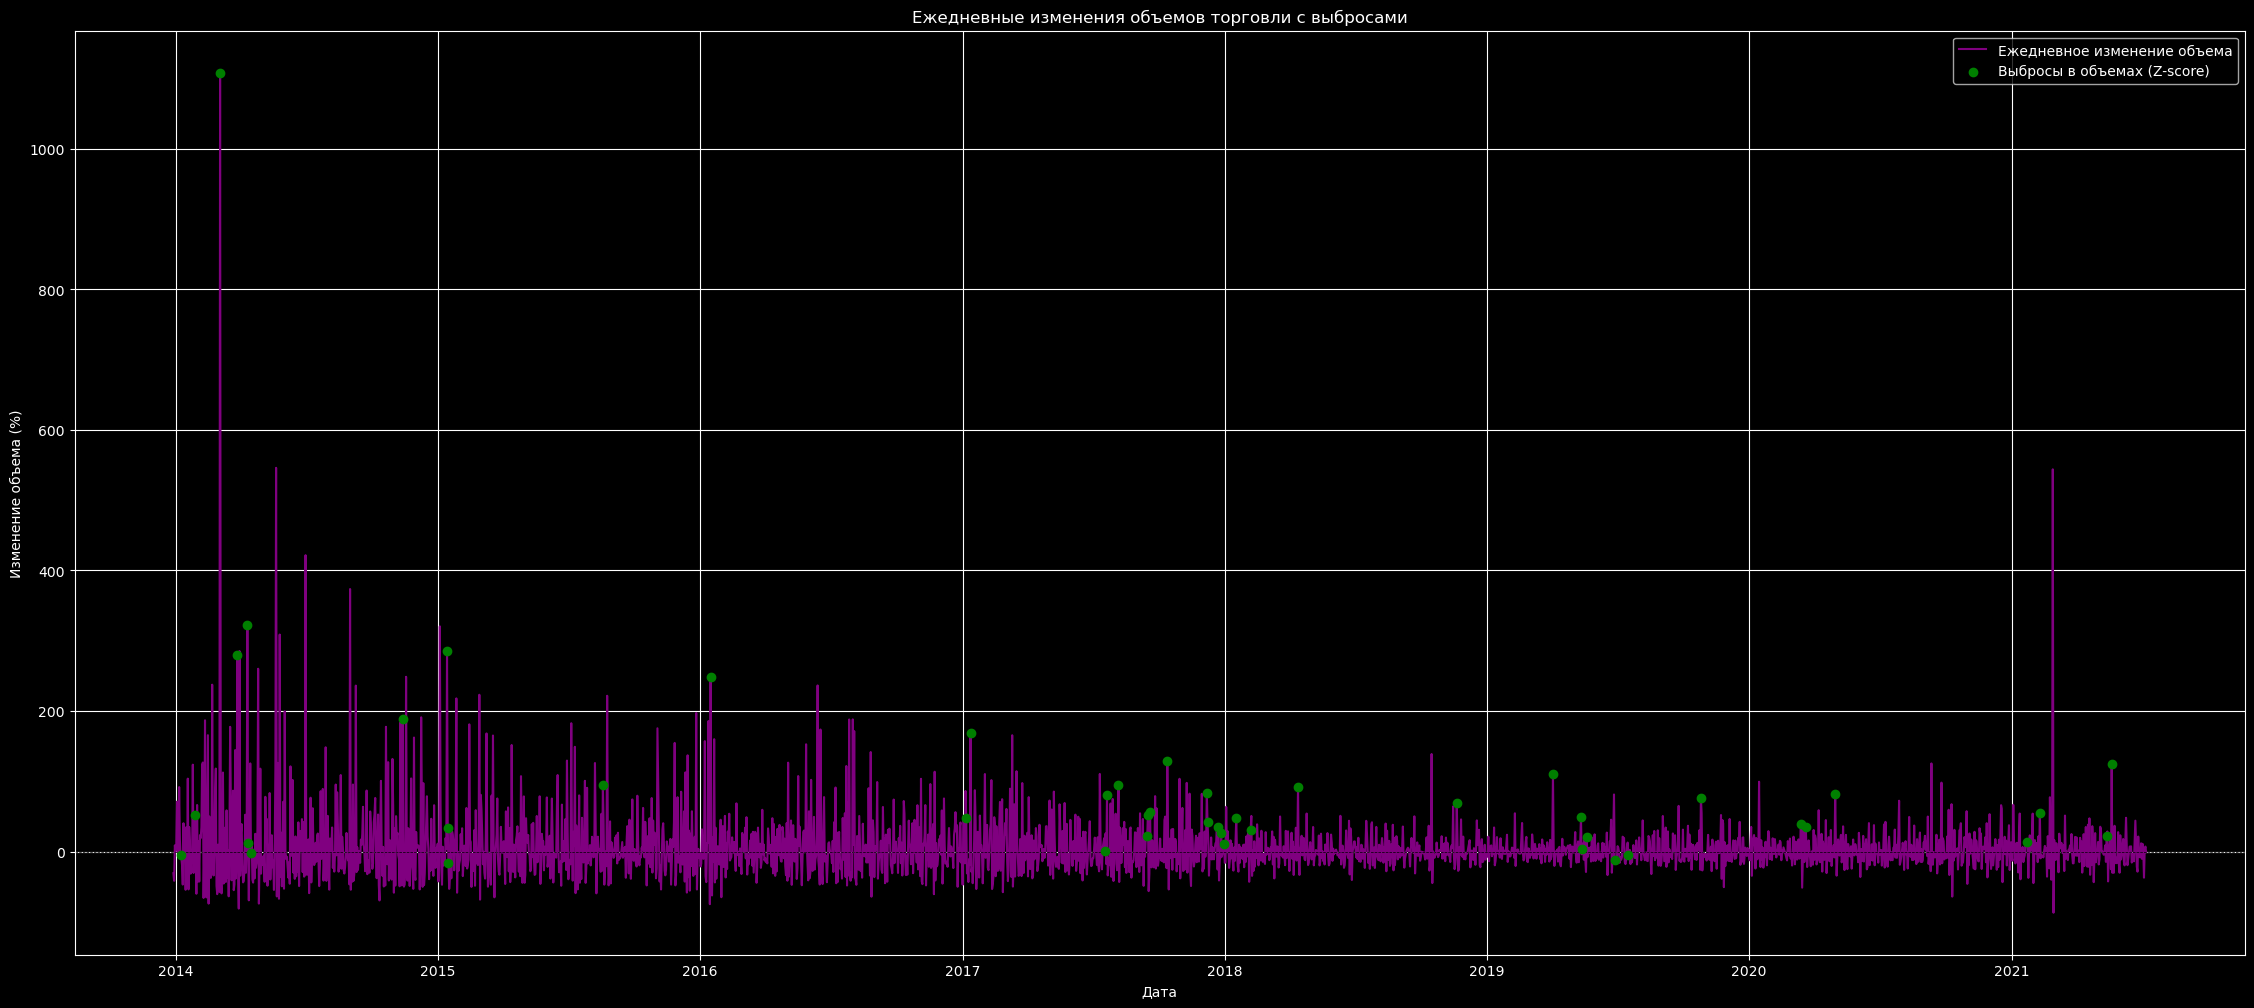

In [21]:
from scipy.stats import zscore

df['price_change'] = df['Close'].pct_change() * 100  
df['volume_change'] = df['Volume'].pct_change() * 100  


Q1 = df['price_change'].quantile(0.25)
Q3 = df['price_change'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['price_change'] < lower_bound) | (df['price_change'] > upper_bound)]


df['zscore_price_change'] = zscore(df['price_change'].fillna(0))  
outliers_zscore = df[np.abs(df['zscore_price_change']) > 3]  


plt.figure(figsize=(28, 12))
plt.plot(df.index, df['price_change'], label='Ежедневное изменение цены', color='blue')
plt.scatter(outliers_iqr.index, outliers_iqr['price_change'], color='red', label='Выбросы (IQR)', zorder=5)
plt.scatter(outliers_zscore.index, outliers_zscore['price_change'], color='green', label='Выбросы (Z-score)', zorder=5)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Дата')
plt.ylabel('Ежедневное изменение (%)')
plt.title('Ежедневные изменения цены с выбросами')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(28, 12))
plt.plot(df.index, df['volume_change'], label='Ежедневное изменение объема', color='purple')
plt.scatter(outliers_zscore.index, outliers_zscore['volume_change'], color='green', label='Выбросы в объемах (Z-score)', zorder=5)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Дата')
plt.ylabel('Изменение объема (%)')
plt.title('Ежедневные изменения объемов торговли с выбросами')
plt.legend()
plt.grid(True)
plt.show()

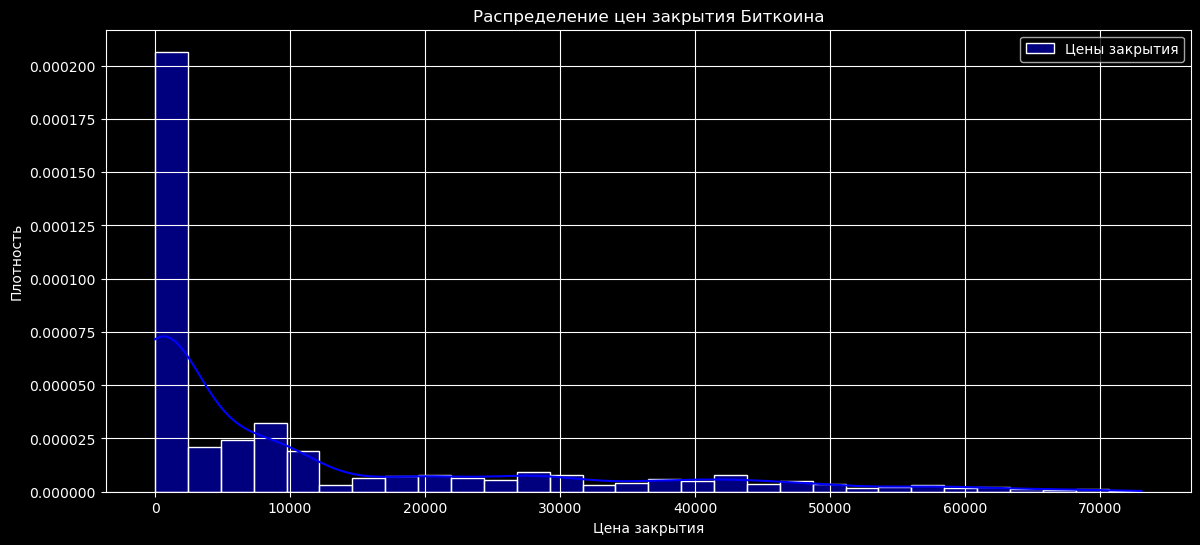

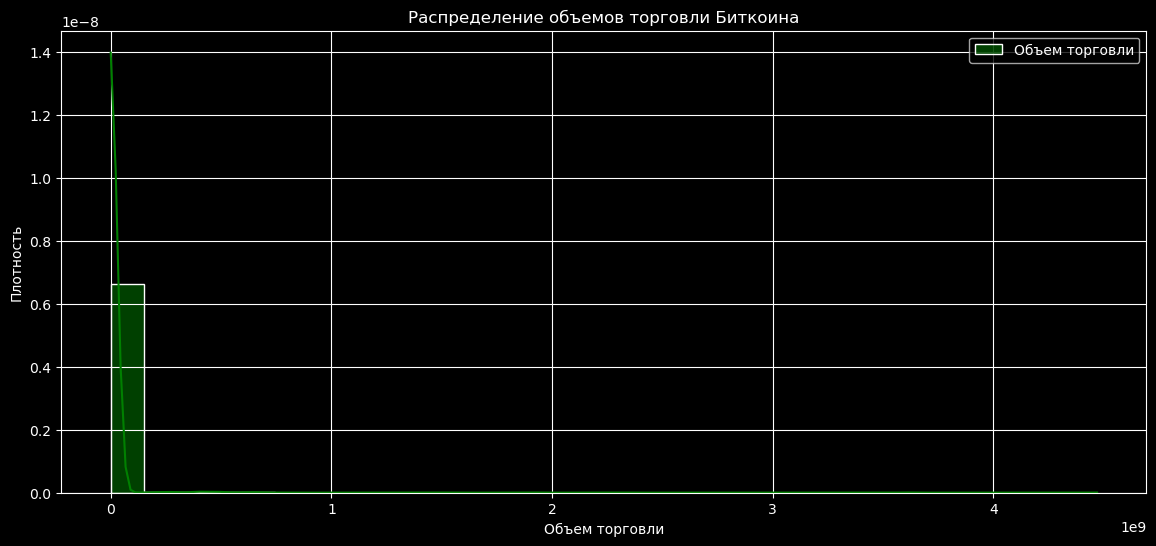

In [116]:
plt.figure(figsize=(14, 6))
sns.histplot(df['Open'], bins=30, kde=True, color='blue', label='Цены закрытия', stat='density')
plt.title('Распределение цен закрытия Биткоина')
plt.xlabel('Цена закрытия')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
sns.histplot(df['Vol.'], bins=30, kde=True, color='green', label='Объем торговли', stat='density')
plt.title('Распределение объемов торговли Биткоина')
plt.xlabel('Объем торговли')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()